In [92]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [93]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [94]:
df.shape

(1000, 8)

In [95]:
## checking the rows with null in some attribs
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [96]:
df.duplicated().sum()
# no duplicated rows ar ethere 

0

In [97]:
# check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [98]:
# number of unique values in each col would be helful in knowing if the col should be treated 
# as categoiral or not
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [99]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [100]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [101]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [102]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [103]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [104]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


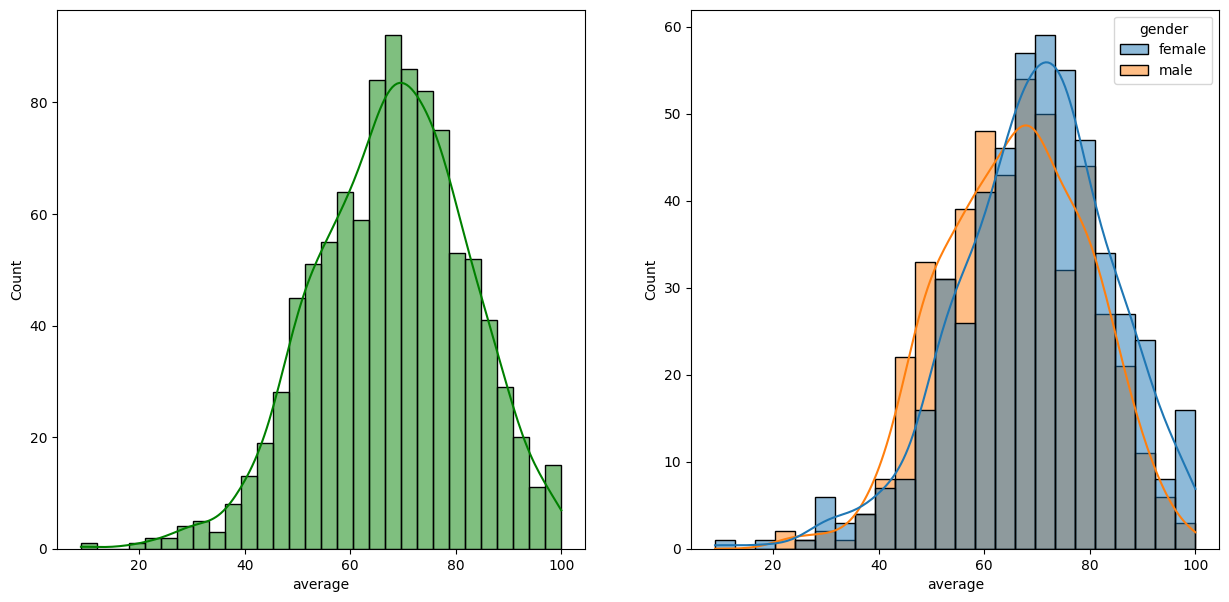

In [105]:
fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(df, x = 'average', bins = 30 , kde= True, color = 'g')

plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

In [106]:
## average marks by female are more 

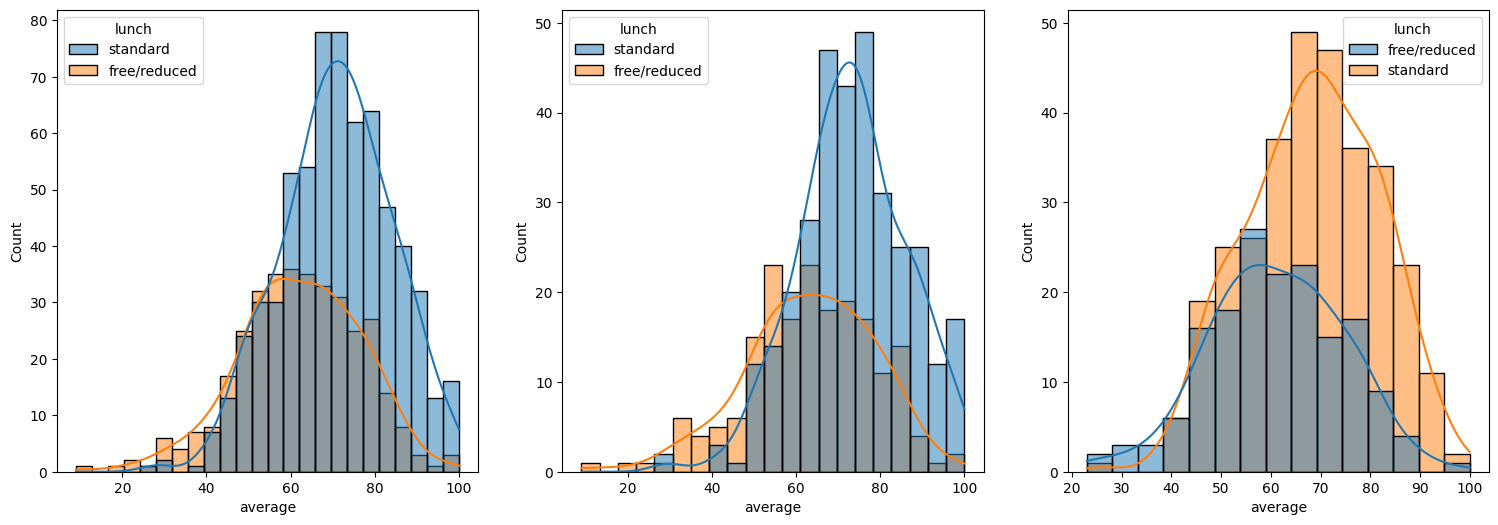

In [107]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

In [108]:
# Standard lunch helps perform well in exams.
# Standard lunch helps perform well in exams be it a male or a female.

In [109]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

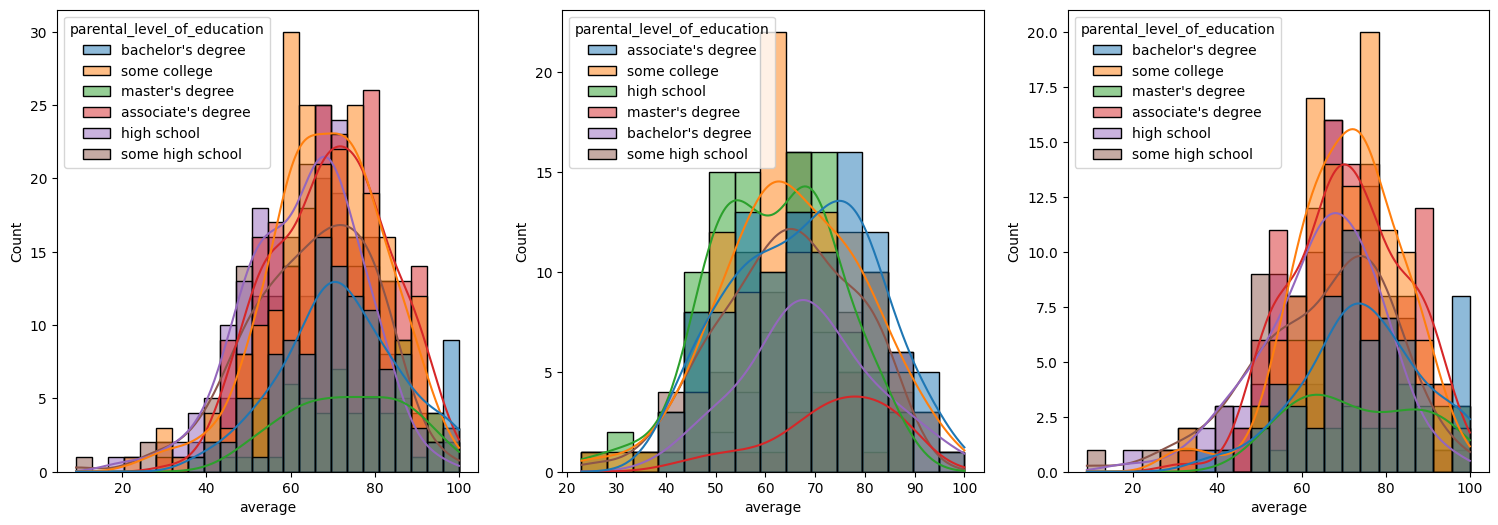

In [110]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

In [111]:
# In general parent's education don't help student perform well in exam.
# 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
# 3rd plot we can see there is no effect of parent's education on female students

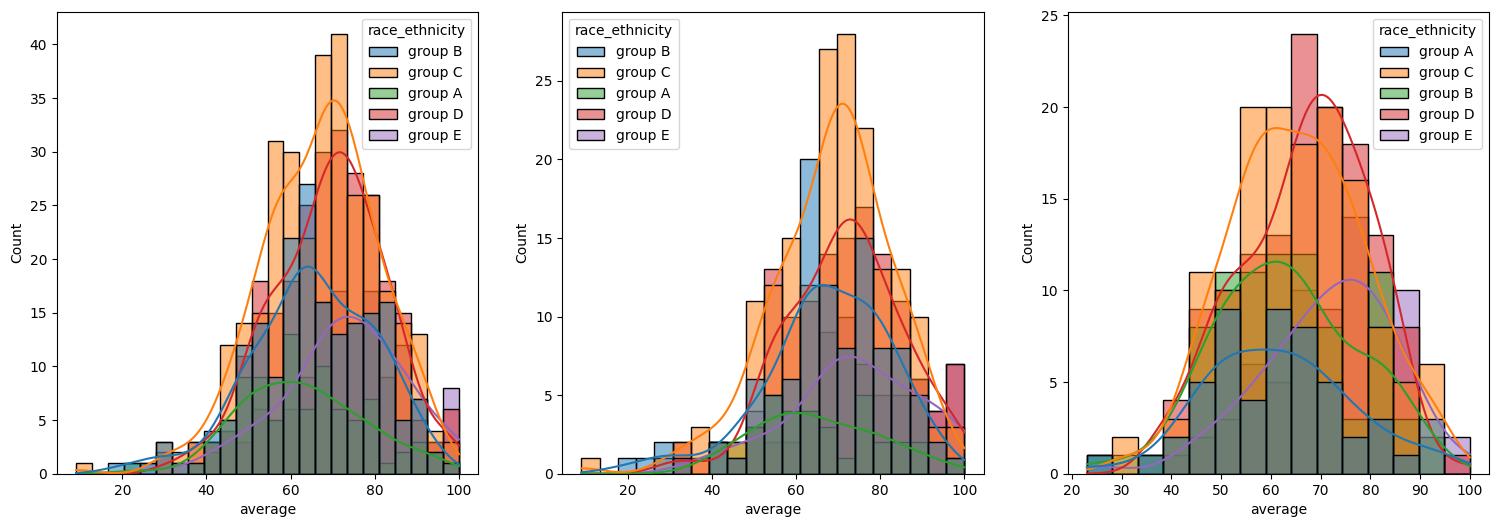

In [112]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

In [113]:
# Students of group A and group B tends to perform poorly in exam.
# Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

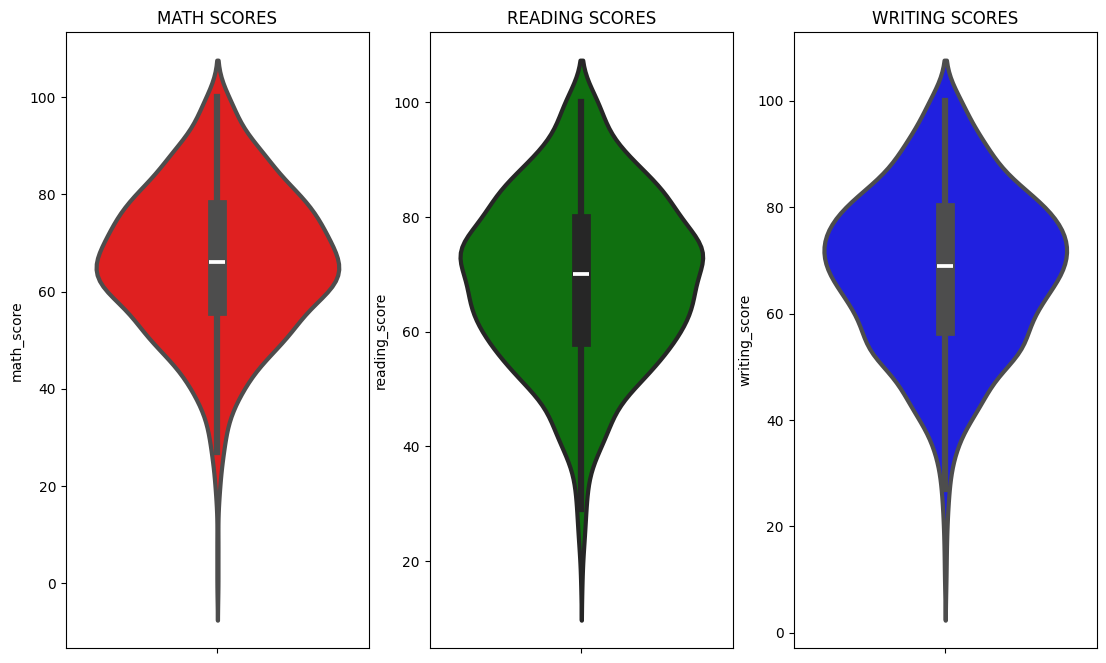

In [114]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

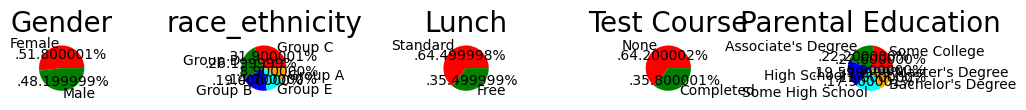

In [115]:
plt.figure(figsize = (10,12))
plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off') 


plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('race_ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()







In [116]:
# Number of Male and Female students is almost equal
# Number students are greatest in Group C
# Number of students who have standard lunch are greater
# Number of students who have not enrolled in any test preparation course is greater
# Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

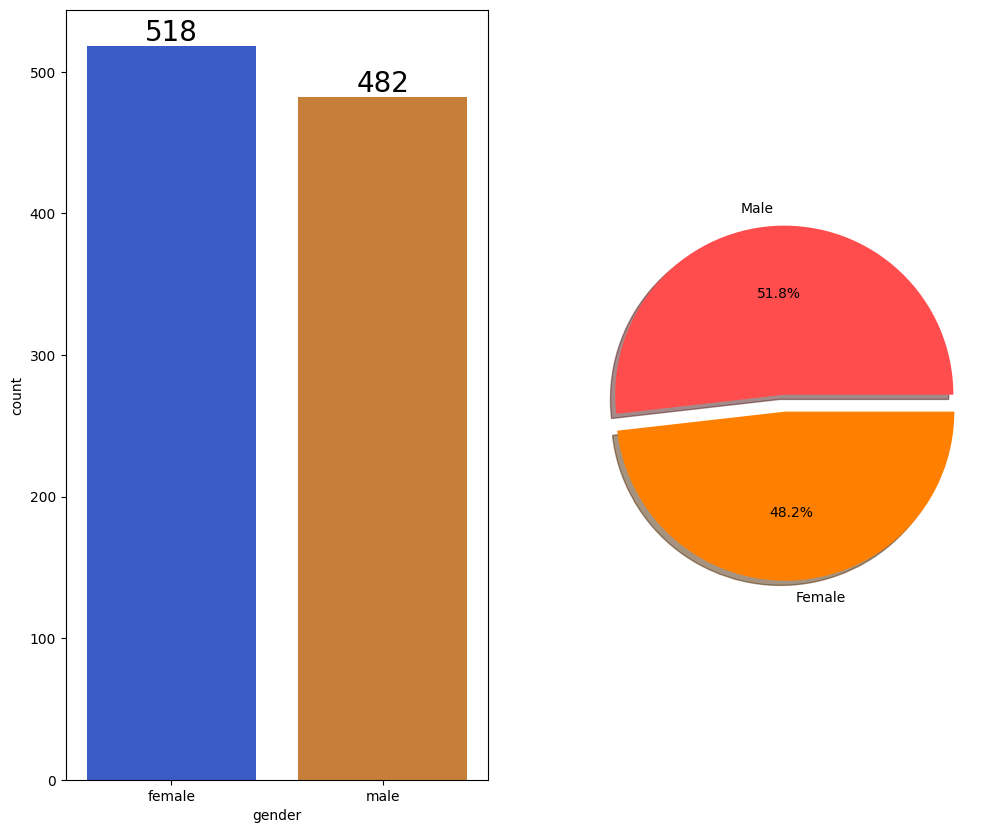

In [117]:
f,ax = plt.subplots(1,2 , figsize = (12,10))
sns.countplot(x = df['gender'], data = df, ax = ax[0], palette = 'bright', saturation = 0.55)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [118]:
# Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

In [121]:
# bivariate analysis to check gender impact on perfroamce

In [129]:
gender_group = df[['math_score','reading_score','writing_score','total score','average','gender']].groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


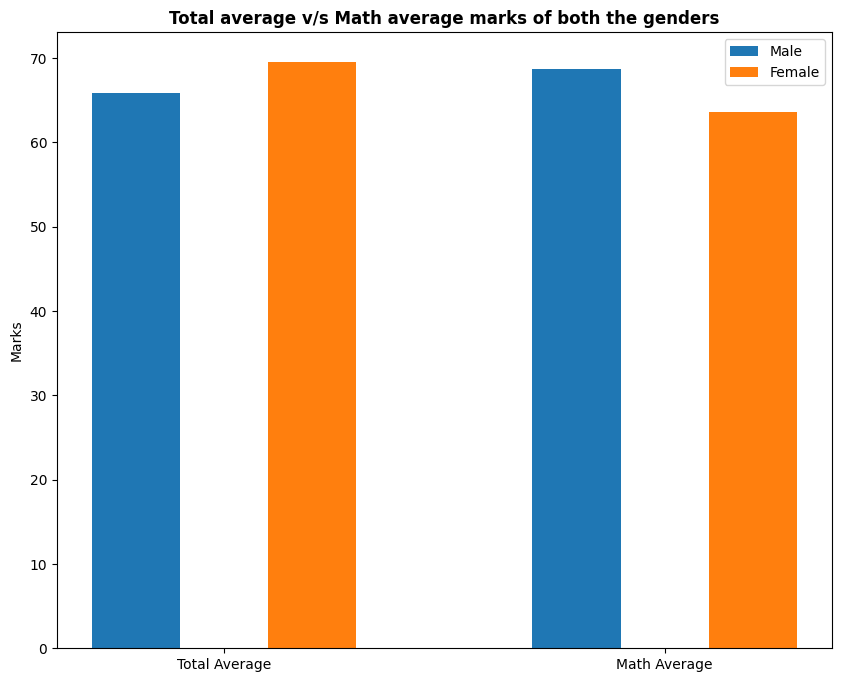

In [143]:
plt.figure(figsize= (10,8))
X = ['Total Average','Math Average']

female_score = [gender_group['average'][0],  gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores,0.2, label = 'Male')
plt.bar(X_axis + 0.2, female_score,0.2, label = 'Female')
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()


In [144]:
# On an average females have a better overall score than men.
#whereas males have scored higher in Maths.

In [145]:
# How is Group wise distribution ?
# Is Race/Ehnicity has any impact on student's performance ?

In [146]:
#univariate  analysis of the race/ethnicity 
## how are the race distirbutes

([<matplotlib.patches.Wedge at 0x1bdcbf9f700>,
 [Text(0.592324332246979, 0.9269044640242977, 'group C'),
  Text(-1.1412678264979264, 0.3708203718792959, 'group D'),
  Text(-0.49322154359063347, -0.9832255636109514, 'group B'),
  Text(0.5952333666001212, -0.9250390474384775, 'group E'),
  Text(1.057281962489778, -0.3035701760610943, 'group A')],
 [Text(0.3230859994074431, 0.5055842531041623, '31.9%'),
  Text(-0.6657395654571236, 0.21631188359625594, '26.2%'),
  Text(-0.2690299328676182, -0.5363048528787007, '19.0%'),
  Text(0.32467274541824787, -0.5045667531482604, '14.0%'),
  Text(0.5766992522671516, -0.1655837323969605, '8.9%')])

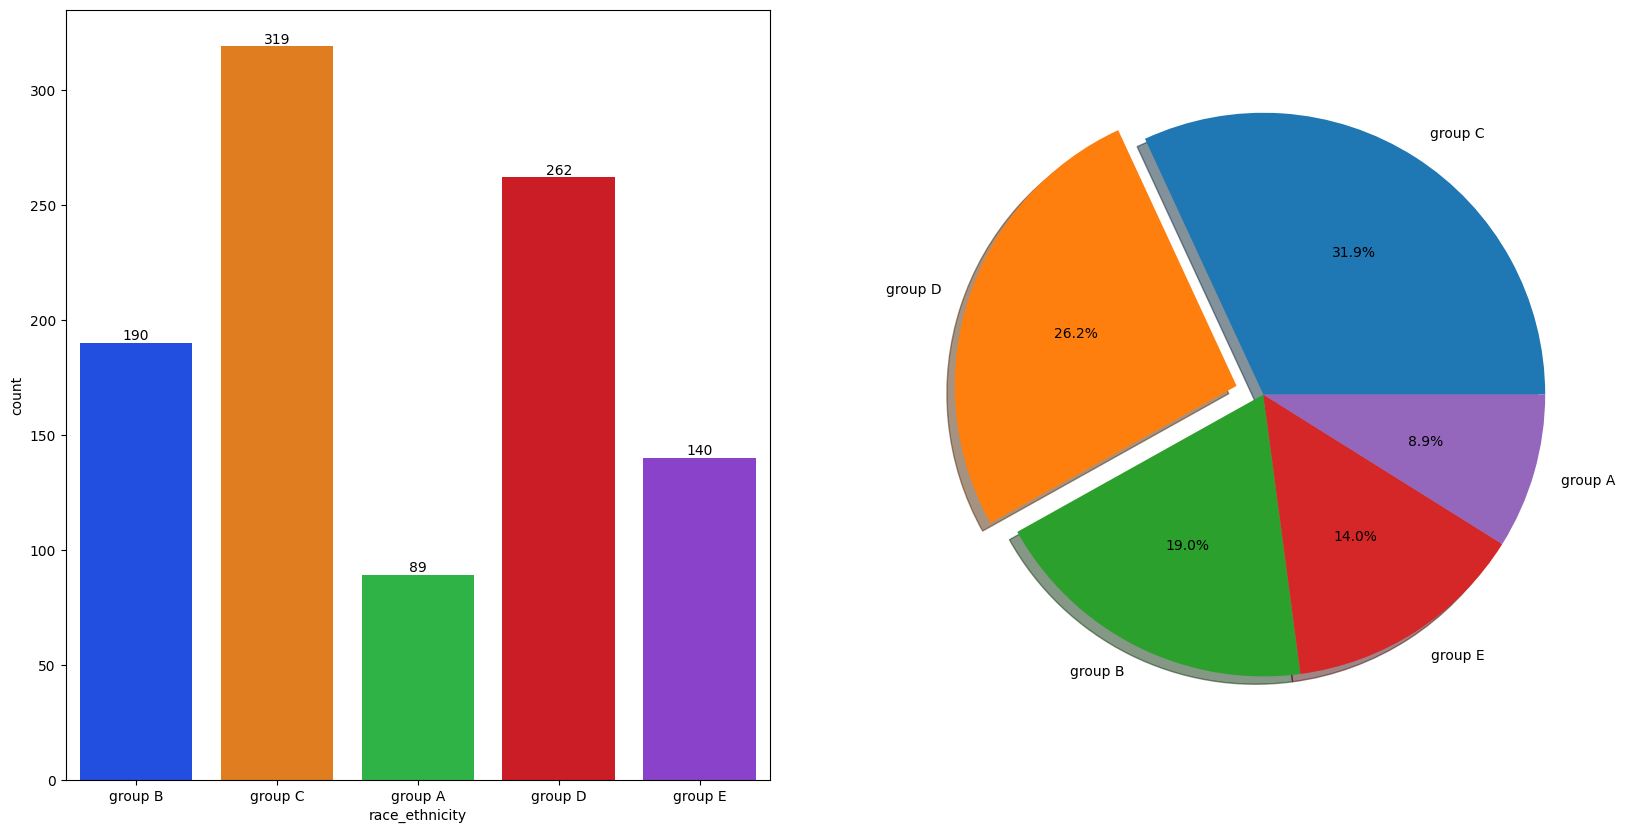

In [161]:
f, ax  = plt.subplots(1,2,figsize = (20,10))
sns.countplot(data = df, x = df['race_ethnicity'], ax = ax[0], palette = 'bright')

for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black')

plt.pie(x = df['race_ethnicity'].value_counts(), labels = df['race_ethnicity'].value_counts().index,autopct='%1.1f%%',shadow =True,explode=[0,0.1,0,0,0])


In [163]:
# Most of the student belonging from group C /group D.
# Lowest number of students belong to groupA.

In [164]:
# bivarte

In [178]:
gp2 = df[['math_score','reading_score','writing_score','total score','average','race_ethnicity']].groupby('race_ethnicity').mean()
gp2.reset_index(inplace=True)
gp2

,race_ethnicity,math_score,reading_score,writing_score,total score,average
0,group A,61.629213,64.674157,62.674157,188.977528,62.992509
1,group B,63.452632,67.352632,65.600000,196.405263,65.468421
2,group C,64.463950,69.103448,67.827586,201.394984,67.131661
3,group D,67.362595,70.030534,70.145038,207.538168,69.179389
4,group E,73.821429,73.028571,71.407143,218.257143,72.752381


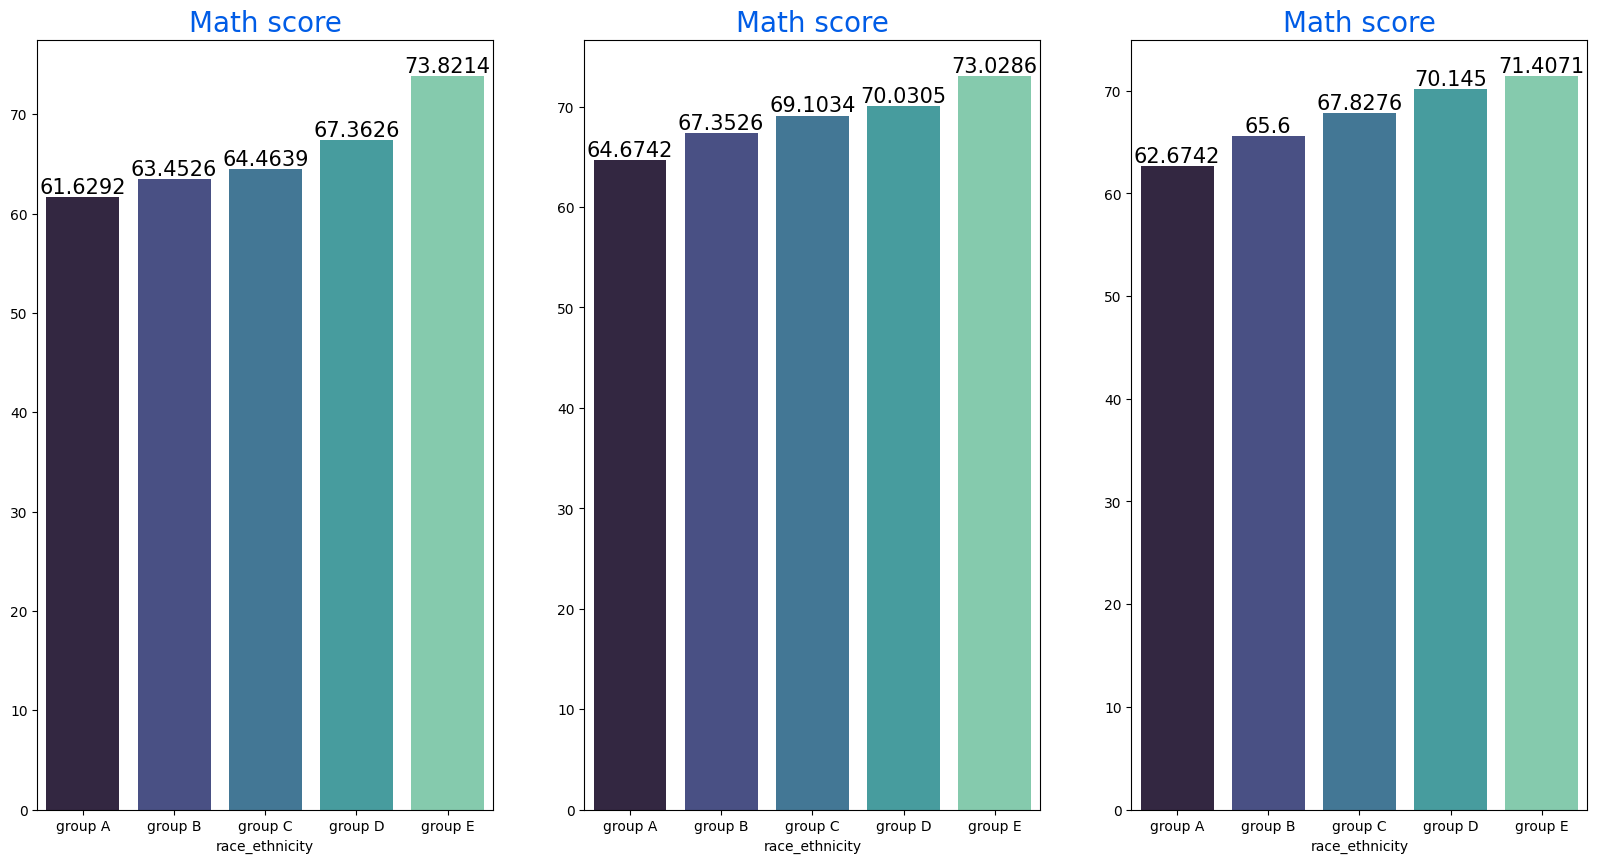

In [209]:
f,ax = plt.subplots(1,3, figsize = (20,10))
sns.barplot(x=gp2[['race_ethnicity','math_score']].groupby('race_ethnicity').mean().index,y=gp2[['race_ethnicity','math_score']].groupby('race_ethnicity').mean().values.squeeze(),palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)


for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 15)

sns.barplot(x=gp2[['race_ethnicity','reading_score']].groupby('race_ethnicity').mean().index,y=gp2[['race_ethnicity','reading_score']].groupby('race_ethnicity').mean().values.squeeze(),palette = 'mako',ax=ax[1])
ax[1].set_title('Math score',color='#005ce6',size=20)


for container in ax[1].containers:
    ax[1].bar_label(container, color = 'black', size = 15)



sns.barplot(x=gp2[['race_ethnicity','writing_score']].groupby('race_ethnicity').mean().index,y=gp2[['race_ethnicity','writing_score']].groupby('race_ethnicity').mean().values.squeeze(),palette = 'mako',ax=ax[2])
ax[2].set_title('Math score',color='#005ce6',size=20)


for container in ax[2].containers:
    ax[2].bar_label(container, color = 'black', size = 15)



In [210]:
# Group E students have scored the highest marks.
# Group A students have scored the lowest marks.
# Students from a lower Socioeconomic status have a lower avg in all course subjects

In [ ]:
# parental education

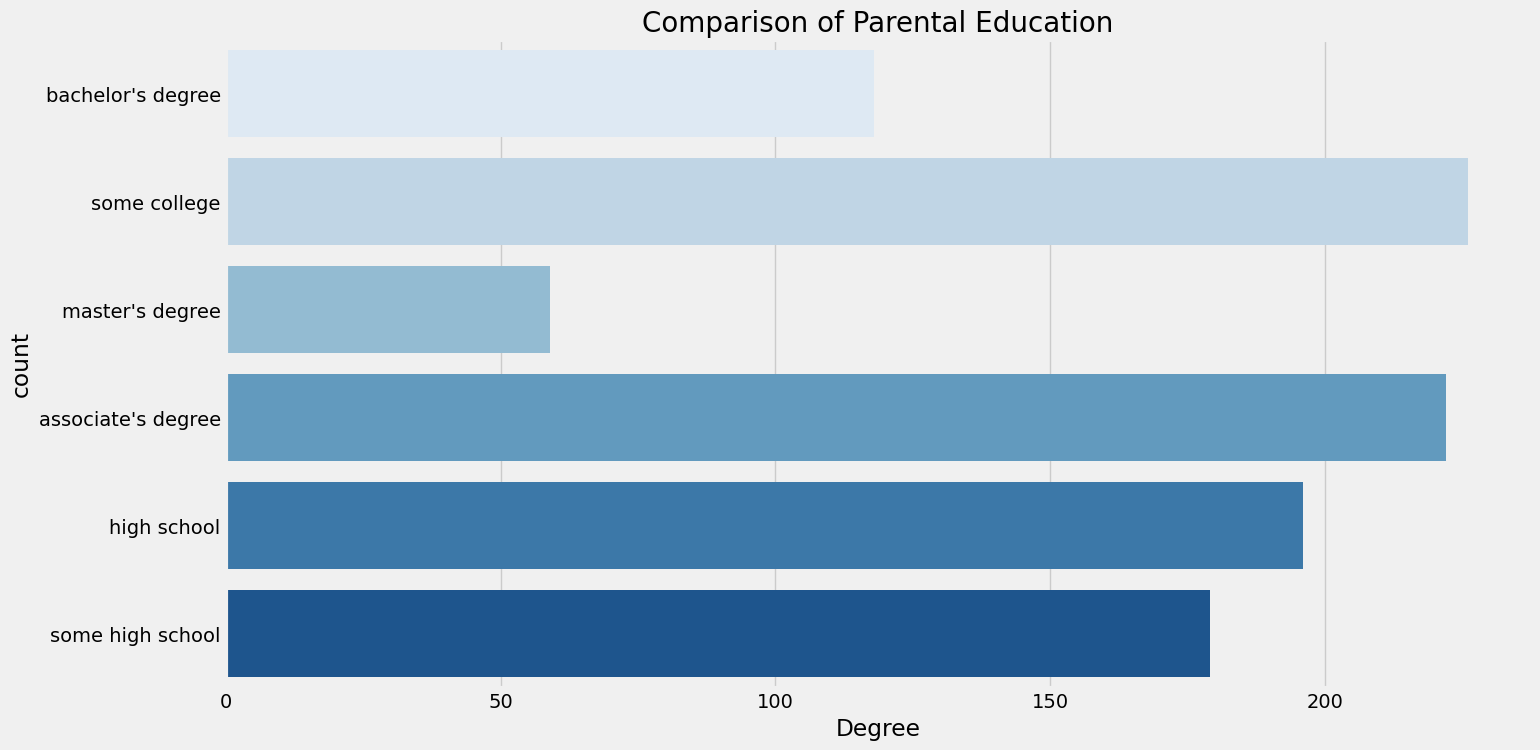

In [215]:
plt.figure(figsize= (15,8))
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

In [217]:
# Largest number of parents are from some college.

In [218]:
# BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

In [244]:
# df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.show()


pg = df[['math_score','reading_score','writing_score','total score','average','parental_level_of_education']].groupby('parental_level_of_education').mean().reset_index()



In [256]:
# list of total and avg value for each of the category
associate = [pg['total score'][0], pg['average'][0]]
bachelor = [pg['total score'][1], pg['average'][1]]
high_school = [pg['total score'][2], pg['average'][2]]
master = [pg['total score'][3], pg['average'][3]]
college = [pg['total score'][4], pg['average'][4]]
sh = [pg['total score'][5], pg['average'][5]]

In [257]:
pg

,parental_level_of_education,math_score,reading_score,writing_score,total score,average
0,associate's degree,67.882883,70.927928,69.896396,208.707207,69.569069
1,bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923729
2,high school,62.137755,64.704082,62.448980,189.290816,63.096939
3,master's degree,69.745763,75.372881,75.677966,220.796610,73.598870
4,some college,67.128319,69.460177,68.840708,205.429204,68.476401
5,some high school,63.497207,66.938547,64.888268,195.324022,65.108007


In [258]:
X_axis = np.arange(len(X))

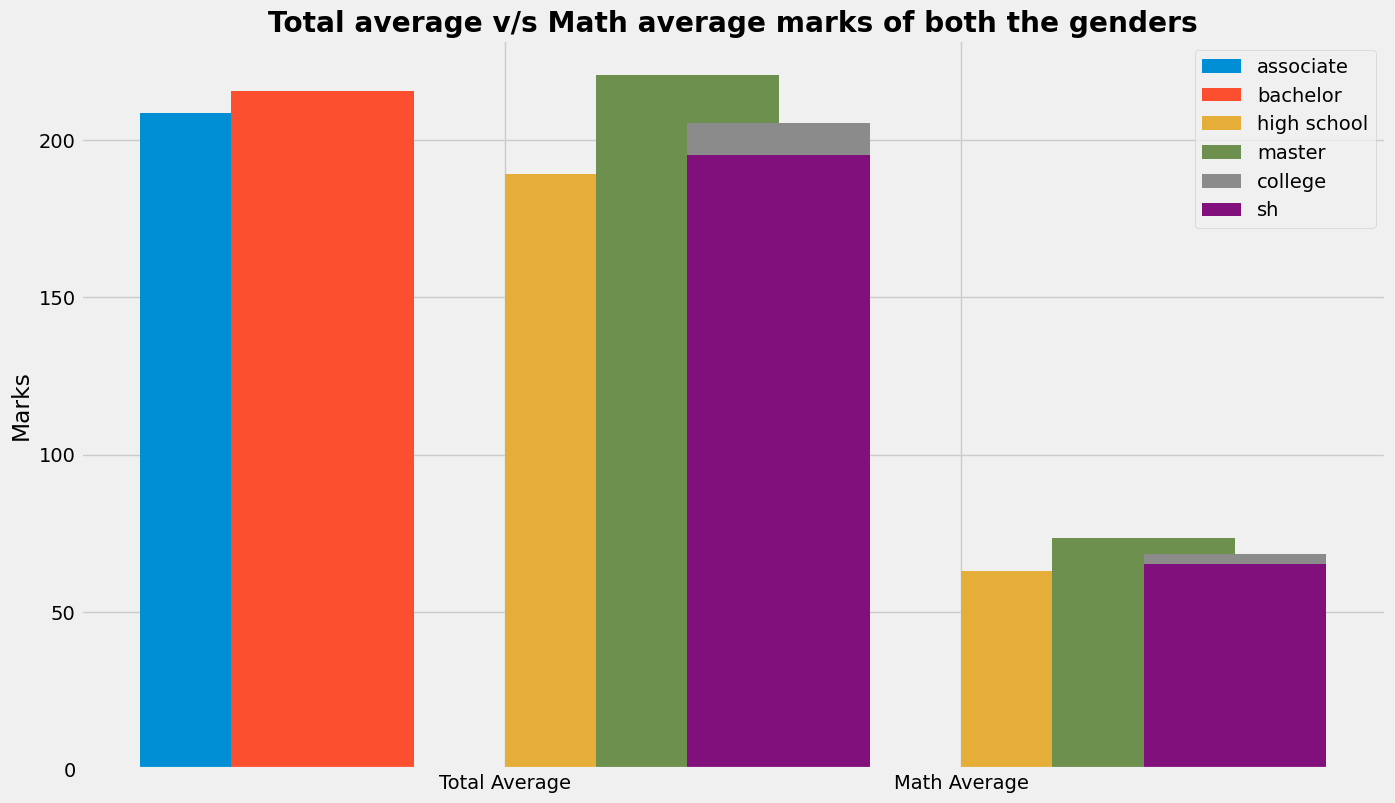

In [259]:
plt.bar(X_axis-0.6, associate , 0.4, label = 'associate')
plt.bar(X_axis-0.4, bachelor , 0.4, label = 'bachelor')
plt.bar(X_axis+0.2, high_school , 0.4, label = 'high school')
plt.bar(X_axis+0.4, master , 0.4, label = 'master')
plt.bar(X_axis+0.6, college , 0.4, label = 'college')
plt.bar(X_axis+0.6, sh , 0.4, label = 'sh')
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

In [251]:
# list of total and avg value for each of the category
bachlor = [pg['total score'][0], pg['average'][0]]
college = [pg['total score'][1], pg['average'][1]]
master = [pg['total score'][2], pg['average'][2]]
associate = [pg['total score'][3], pg['average'][3]]
high_school = [pg['total score'][4], pg['average'][4]]
sh = [pg['total score'][5], pg['average'][5]]

In [260]:
## master or bachelor have slightly high numbers

In [261]:
## bivariate

In [262]:
pg

,parental_level_of_education,math_score,reading_score,writing_score,total score,average
0,associate's degree,67.882883,70.927928,69.896396,208.707207,69.569069
1,bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923729
2,high school,62.137755,64.704082,62.448980,189.290816,63.096939
3,master's degree,69.745763,75.372881,75.677966,220.796610,73.598870
4,some college,67.128319,69.460177,68.840708,205.429204,68.476401
5,some high school,63.497207,66.938547,64.888268,195.324022,65.108007


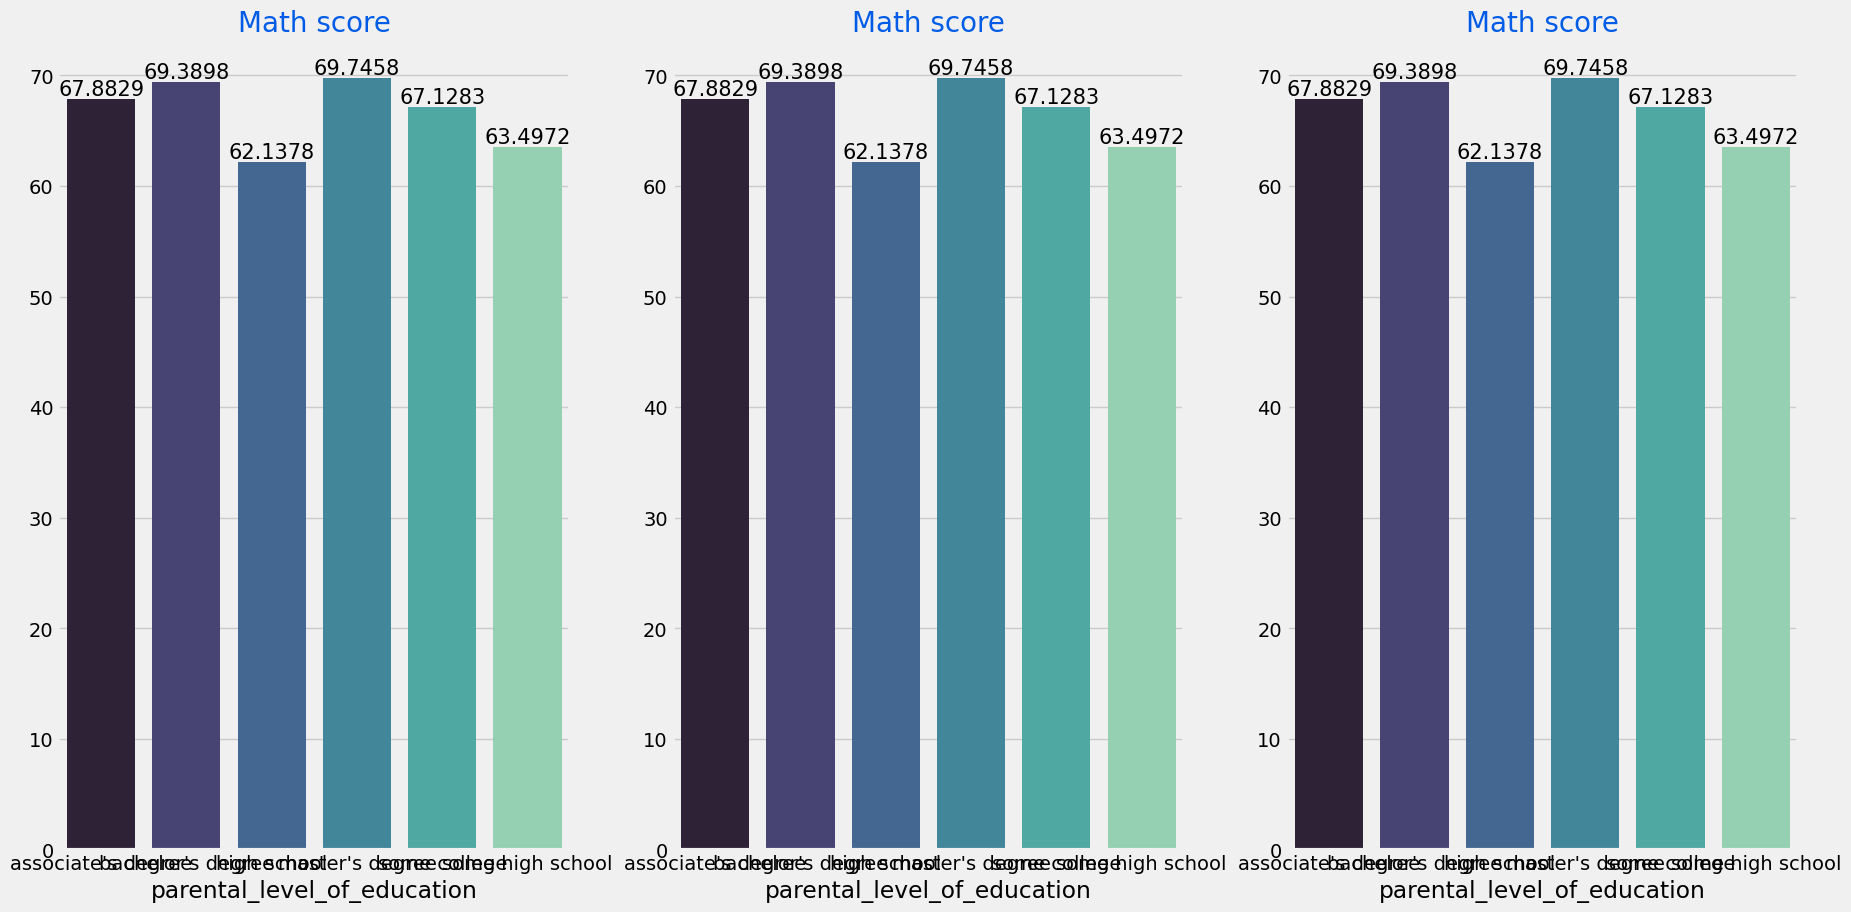

In [263]:
f,ax = plt.subplots(1,3, figsize = (20,10))
sns.barplot(x=pg[['parental_level_of_education','math_score']].groupby('parental_level_of_education').mean().index,y=pg[['parental_level_of_education','math_score']].groupby('parental_level_of_education').mean().values.squeeze(),palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)


for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 15)

sns.barplot(x=pg[['parental_level_of_education','math_score']].groupby('parental_level_of_education').mean().index,y=pg[['parental_level_of_education','math_score']].groupby('parental_level_of_education').mean().values.squeeze(),palette = 'mako',ax=ax[1])
ax[1].set_title('Math score',color='#005ce6',size=20)



for container in ax[1].containers:
    ax[1].bar_label(container, color = 'black', size = 15)


sns.barplot(x=pg[['parental_level_of_education','math_score']].groupby('parental_level_of_education').mean().index,y=pg[['parental_level_of_education','math_score']].groupby('parental_level_of_education').mean().values.squeeze(),palette = 'mako',ax=ax[2])
ax[2].set_title('Math score',color='#005ce6',size=20)


for container in ax[2].containers:
    ax[2].bar_label(container, color = 'black', size = 15)



In [264]:
## Lunch univariate and bivartiate

In [266]:
lg = df[['math_score','reading_score','writing_score','total score','average','lunch']].groupby('lunch').mean().reset_index()

In [267]:
lg

,lunch,math_score,reading_score,writing_score,total score,average
0,free/reduced,58.921127,64.653521,63.022535,186.597183,62.199061
1,standard,70.034109,71.654264,70.823256,212.511628,70.837209


In [268]:
# Student's Performance is related with lunch, race, parental level education
# Females lead in pass percentage and also are top-scorers
# Student's Performance is not much related with test preparation course
# Finishing preparation course is benefitial.

In [269]:
## chekcing outlier

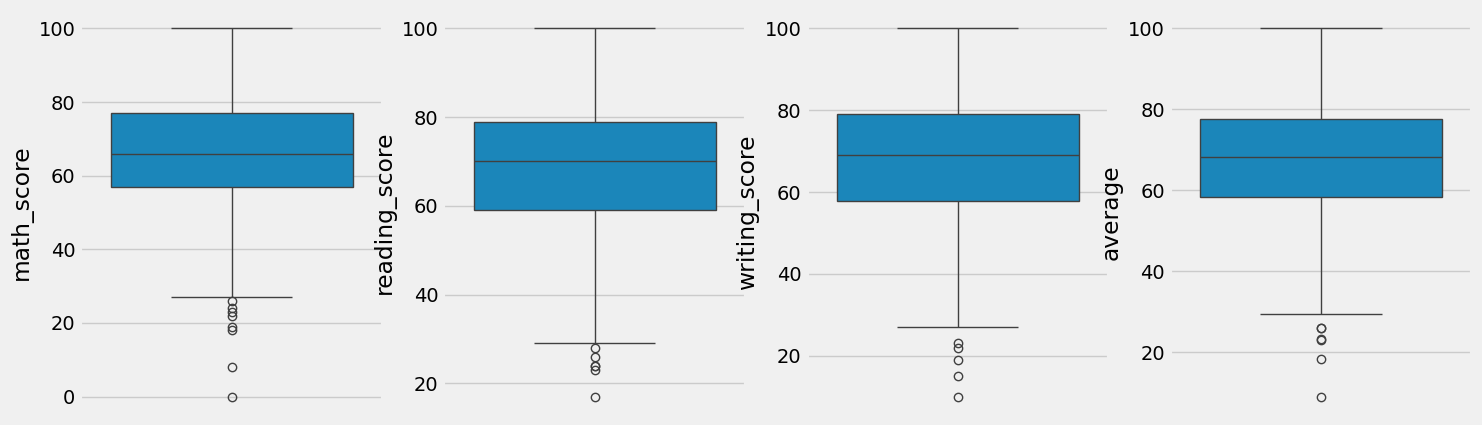

In [274]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'])
plt.subplot(142)
sns.boxplot(df['reading_score'])
plt.subplot(143)
sns.boxplot(df['writing_score'])
plt.subplot(144)
sns.boxplot(df['average'])
plt.show()